# Import the data

In [127]:
import pandas as pd
df = pd.read_excel("Naukri-IT.xlsx")
df

,web-scraper-order,web-scraper-start-url,title,title-href,company,work-experience,salary-INR,locations,job-description,employment-type,role-category,education,preferred-key-skills,key-skills
0,1742161998-1,https://www.naukri.com/jobs-in-india-10?indust...,Principal Exadata DBA Professional,https://www.naukri.com/job-listings-principal-...,Oracle,6 - 10 years,Not Disclosed,"[{""locations"":""Kolkata""},{""locations"":""Mumbai""...",Minimum 6+ Years experience as a Oracle databa...,"Full Time, Permanent",DBA / Data warehousing,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""Oracle database""},{""key-skills..."
1,1742162001-2,https://www.naukri.com/jobs-in-india-10?indust...,Software Developer 5,https://www.naukri.com/job-listings-software-d...,Oracle,10 - 12 years,Not Disclosed,"[{""locations"":""Kolkata""},{""locations"":""Mumbai""...","Take a leading role in the development, testin...","Full Time, Permanent",Software Development,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""Computer science""},{""key-skill..."
2,1742162004-3,https://www.naukri.com/jobs-in-india-10?indust...,Software Developer 4,https://www.naukri.com/job-listings-software-d...,Oracle,10 - 12 years,Not Disclosed,"[{""locations"":""Kolkata""},{""locations"":""Mumbai""...","Support the design, deployment, and operations...","Full Time, Permanent",Software Development,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""TCP""},{""key-skills"":""Cloud com..."
3,1742162006-4,https://www.naukri.com/jobs-in-india-10?indust...,Software Development Manager,https://www.naukri.com/job-listings-software-d...,Oracle,5 - 10 years,Not Disclosed,"[{""locations"":""Kolkata""},{""locations"":""Mumbai""...","Lead a team that builds new features, enhancem...","Full Time, Permanent",Software Development,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""Computer science""},{""key-skill..."
4,1742162009-5,https://www.naukri.com/jobs-in-india-10?indust...,Senior Site Reliability Developer,https://www.naukri.com/job-listings-senior-sit...,Oracle,6 - 10 years,Not Disclosed,"[{""locations"":""Kolkata""},{""locations"":""Mumbai""...",Identifies solutions to knowledge of server ha...,"Full Time, Permanent",Software Development,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""Computer science""},{""key-skill..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1742162267-96,https://www.naukri.com/jobs-in-india-2?industr...,S&C GN - T&O - Instructional Design - Consultant,https://www.naukri.com/job-listings-s-c-gn-t-o...,Accenture,6 - 8 years,Not Disclosed,"[{""locations"":""Mumbai""},{""locations"":""Gurugram...",About The Role :\n\nJob Title - \n\nInstructio...,"Full Time, Permanent",Content Management (Print / Online / Electronic),"[{""education"":""UG: Any Graduate""},{""education""...","[{""preferred-key-skills"":""storyboarding""},{""pr...","[{""key-skills"":""storyboarding""},{""key-skills"":..."
96,1742162270-97,https://www.naukri.com/jobs-in-india-2?industr...,ServiceNow App Engine Developer,https://www.naukri.com/job-listings-servicenow...,Vimerse Infotech,1 - 6 years,Not Disclosed,"[{""locations"":""Kolkata""},{""locations"":""Mumbai""...",Configuration/Customization of the ServiceNow ...,"Full Time, Permanent",Software Development,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""Process automation""},{""key-ski..."
97,1742162272-98,https://www.naukri.com/jobs-in-india-2?industr...,Trainee Transaction Processing Officer,https://www.naukri.com/job-listings-trainee-tr...,Mphasis,3 months duration,Unpaid,"[{""locations"":""Pune""}]",Profile/Designation: Trainee Transaction P...,"Full Time, Permanent",Other,"[{""education"":""UG: Any Graduate""},{""education""...",[],"[{""key-skills"":""Training""},{""key-skills"":""Usag..."
98,1742162275-99,https://www.naukri.com/jobs-in-india-2?ind

# Clean the data

In [128]:
# Drop some irrelevant columns
df = df.drop(columns=["web-scraper-order", "web-scraper-start-url"], axis=1)

# Rename the 'title-href' column to "url"
df = df.rename(columns={"title-href": "url"})

In [129]:
# Extract value1, value2, value3 for the columns whose value is in the following format:
# "[{"column_name": "value1"}, {"column_name": "value2"}, {"column_name": "value3"}]"
import ast

def clean_education_data(dataframe, column_name):
    """
    Cleans the education data in the specified column of the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to clean.

    Returns:
    pd.DataFrame: The dataframe with cleaned education data.
    """
    def clean_entry(entry):
        # Convert string representation of list to actual list
        entry_list = ast.literal_eval(entry)
        
        # Extract and join the education details
        try:
            cleaned_entry = ",".join([item[column_name] for item in entry_list])
        except TypeError:
            cleaned_entry = np.NA
        
        return cleaned_entry

    # Apply the cleaning function to the specified column
    dataframe[column_name] = dataframe[column_name].apply(clean_entry)
    
    return dataframe

df = clean_education_data(df, 'locations')
df = clean_education_data(df, 'education')
df = clean_education_data(df, 'preferred-key-skills')
df = clean_education_data(df, 'key-skills')

# Visualize the dataset

## Make histograms of some columns

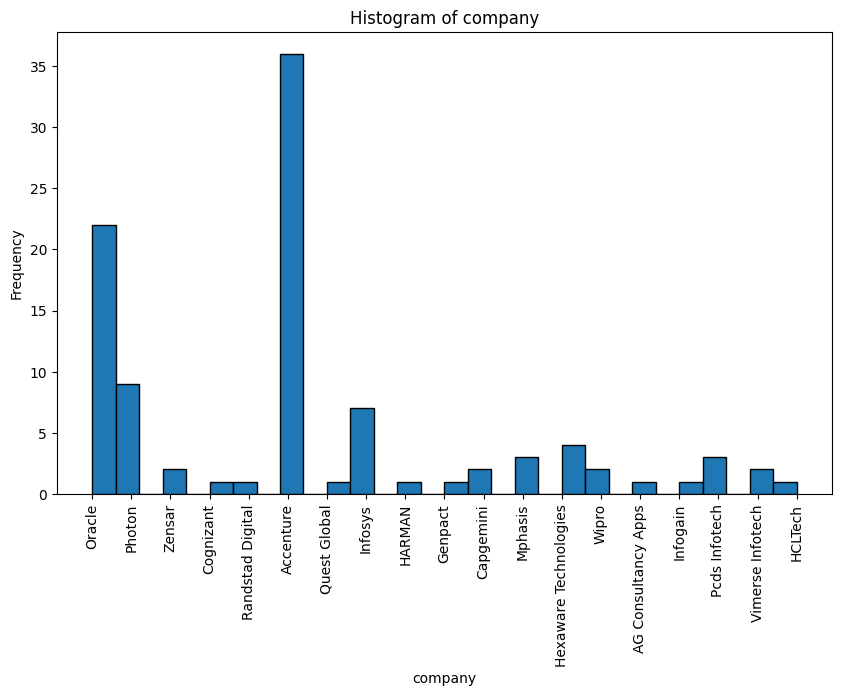

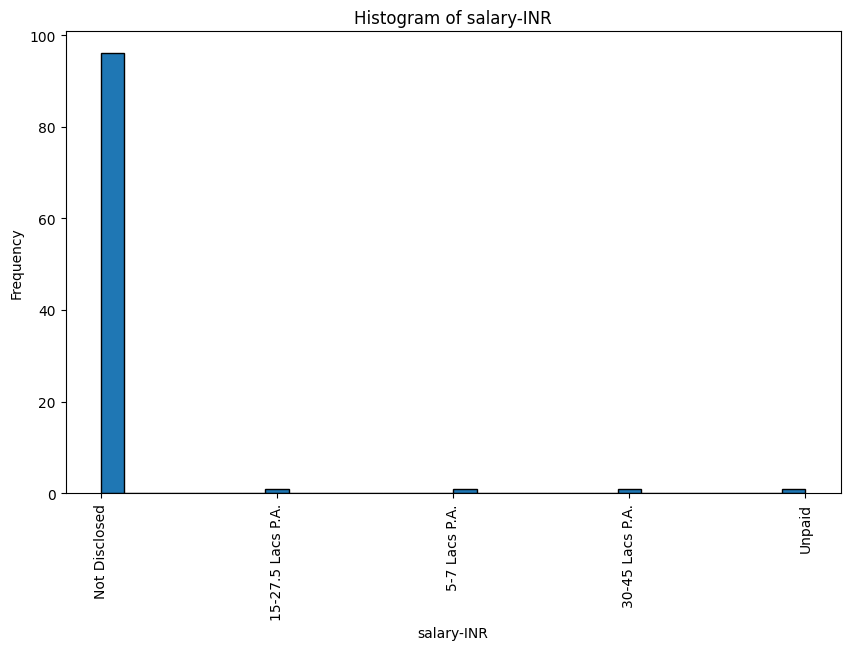

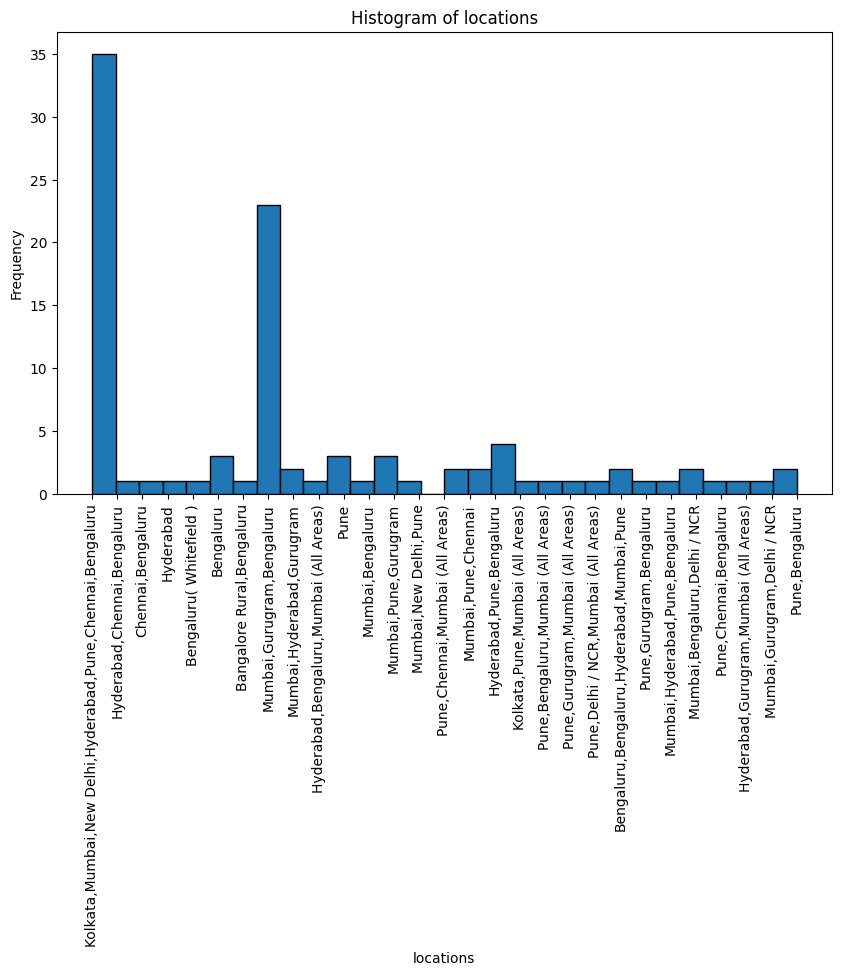

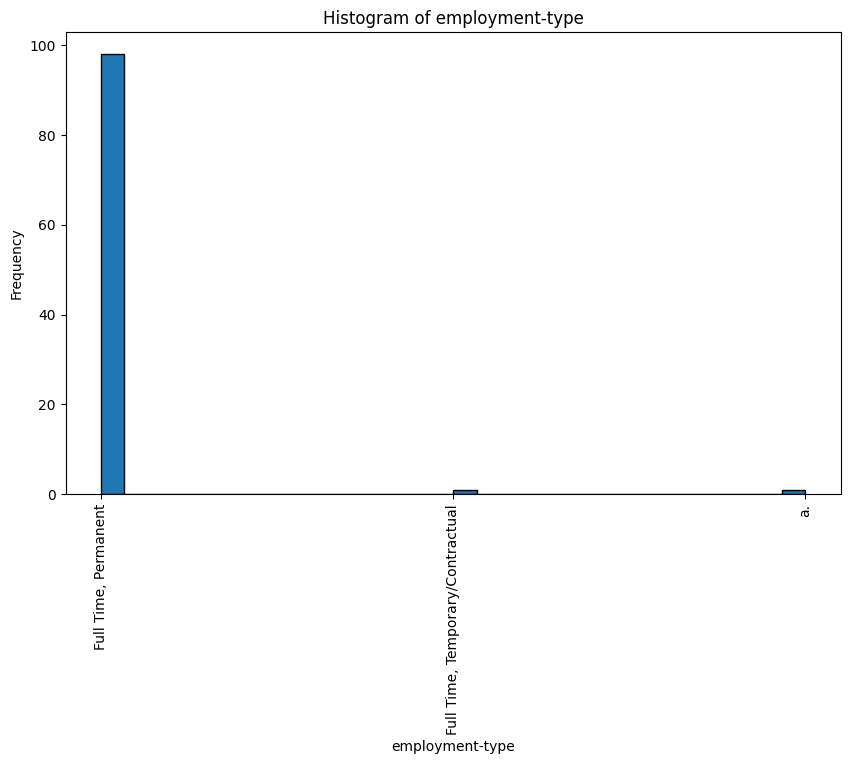

In [130]:
import matplotlib.pyplot as plt

# Created by Copilot
# A method that draw histograms from data in a specific column
def draw_histogram(dataframe, column_name):
    """
    Draws a histogram for the specified column in the dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    if column_name in dataframe.columns:
        plt.figure(figsize=(10, 6))
        dataframe[column_name].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)  # Rotate x-axis labels vertically
        plt.grid(False)
        plt.show()
    else:
        print(f"Column '{column_name}' does not exist in the dataframe.")

draw_histogram(df, 'company')
draw_histogram(df, 'salary-INR')
draw_histogram(df, 'locations')
draw_histogram(df, 'employment-type')

## View missing data

In [131]:
# An array that contain the indices of rows that have any NA value
missing_data_rows = df[df.isna().any(axis=1) | (df == '').any(axis=1)]
missing_data_rows = missing_data_rows[missing_data_rows == True].index.tolist()

print("Rows with missing data: {}".format(missing_data_rows))
print("Number of rows with missing data: {}".format(len(missing_data_rows)))

Rows with missing data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 25, 26, 27, 30, 32, 33, 34, 36, 37, 38, 48, 55, 65, 74, 76, 78, 82, 96, 97]
Number of rows with missing data: 42


In [132]:
# An array that contain the columns that have any NA value
missing_data_columns = df.columns[df.isna().any() | (df == '').any()]

# Print out those columns' name
print("Columns with missing data: {}".format(missing_data_columns.values))

Columns with missing data: ['preferred-key-skills']


In [133]:
# View the missing data
for column_name in missing_data_columns:
    print(df[column_name])
    print("\n")

0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
                            ...                        
95    storyboarding,articulate storyline,instruction...
96                                                     
97                                                     
98    forecasting,logistics,inventory management,ret...
99    Configuration And Troubleshooting,Active Direc...
Name: preferred-key-skills, Length: 100, dtype: object




# Append the cleaned data to the Excel file

In [136]:
# Add the dataframe to a new sheet
with pd.ExcelWriter("Naukri-IT.xlsx", engine='openpyxl', mode='a') as writer:
    df.to_excel(writer, sheet_name="Cleaned data", index=False)